In [2]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
X = np.load('../data/XTSNE.npy')
Y = np.load('../data/YTSNE.npy')

In [4]:
X = np.concatenate(X[:,:,:,0], X[:,:,:,1],X[:,:,:,2])

In [5]:
X.shape

(4468, 128, 128)

In [6]:
nsamples, nx, ny = X.shape
X = X.reshape((nsamples, nx*ny))

In [7]:
pca = PCA(n_components = 3)
pca_result = pca.fit_transform(X)

In [8]:
df = pd.DataFrame()
df['pca_one'] = pca_result[:,0]
df['pca_two'] = pca_result[:,1] 
df['pca_three'] = pca_result[:,2]
df['labels'] = Y
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.30000268 0.08145478 0.08004773]


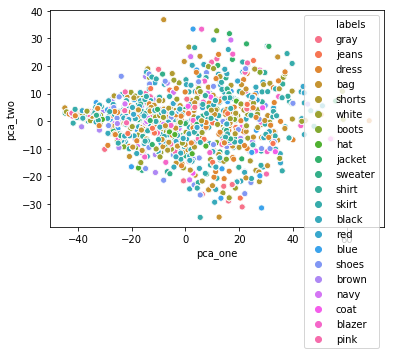

In [9]:
sns.scatterplot(x = 'pca_one', y = 'pca_two', data=df, hue = 'labels')
plt.show()

In [11]:
from sklearn.manifold import TSNE

n_sne = 7000

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4468 samples in 7.456s...
[t-SNE] Computed neighbors for 4468 samples in 995.983s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4468
[t-SNE] Computed conditional probabilities for sample 2000 / 4468
[t-SNE] Computed conditional probabilities for sample 3000 / 4468
[t-SNE] Computed conditional probabilities for sample 4000 / 4468
[t-SNE] Computed conditional probabilities for sample 4468 / 4468
[t-SNE] Mean sigma: 16.783176
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.605042
[t-SNE] KL divergence after 300 iterations: 1.682195


In [14]:
df_tsne = pd.DataFrame()
df_tsne['x_tsne'] = tsne_results[:,0]
df_tsne['y_tsne'] = tsne_results[:,1]
df_tsne['labels'] = Y


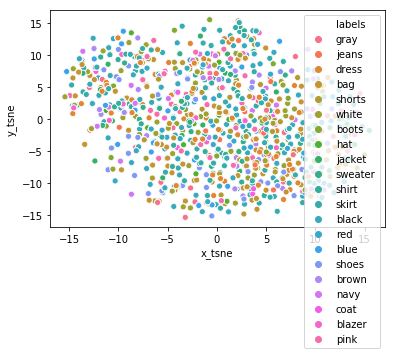

In [15]:
sns.scatterplot(x = 'x_tsne', y = 'y_tsne', data=df_tsne, hue = 'labels')
plt.show()